<a href="https://colab.research.google.com/github/kouliki/Implementation-of-ML-model-for-image-classification/blob/main/Implementation_of_ML_model_for_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
import matplotlib
matplotlib.__version__

'3.8.0'

In [ ]:
tf.__version__

'2.17.1'

In [ ]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


Example training images and their labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'cat']


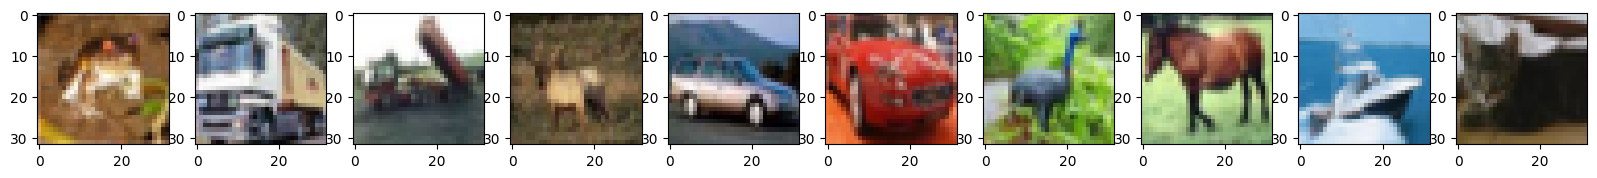

In [ ]:
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:10]]))
print('Corresponding classes for the labels: ' + str([cifar10_classes[x[0]] for x in y_train[0:10]]))

fig, axarr = plt.subplots(1, 10)
fig.set_size_inches(20, 6)

for i in range(10):
    image = x_train[i]
    axarr[i].imshow(image)
plt.show()

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
X_train = x_train / 255.0
X_test = x_test / 255.0
# Every Neuron is expected to have value from 0 to 1 to converge quickly(Gradient Descent)

MLP Network
I/p Layer - Flatten
Hidden layer - 2048, AF = 'RELU'
O/p Layer - 10 , AF-Softmax

In [ ]:
from tensorflow import keras
from keras.layers import Dense
from keras.layers import Flatten

In [ ]:
ann = keras.Sequential()
ann.add(Flatten(input_shape=(32,32,3)))
ann.add(Dense(2048,activation='relu'))
ann.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2048)                │       6,293,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          20,490 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,313,994 (24.09 MB)

 Trainable params: 6,313,994 (24.09 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
ann.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = ann.fit(X_train ,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2891 - loss: 2.1955 - val_accuracy: 0.3413 - val_loss: 1.7938
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3911 - loss: 1.7040 - val_accuracy: 0.4339 - val_loss: 1.6181
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4230 - loss: 1.6229 - val_accuracy: 0.4210 - val_loss: 1.6515
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4440 - loss: 1.5692 - val_accuracy: 0.4460 - val_loss: 1.5559
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4571 - loss: 1.5292 - val_accuracy: 0.4588 - val_loss: 1.5293
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4660 - loss: 1.5101 - val_accuracy: 0.4377 - val_loss: 1.5655
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4762 - loss: 1.4793 - val_accuracy: 0.4508 - val_loss: 1.5622
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4779 - loss: 1.4635 -

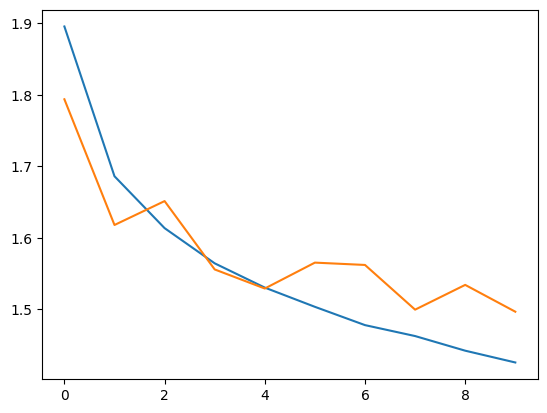

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

## CNN Model

In [ ]:
from tensorflow import keras
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout

In [ ]:
cnn = keras.Sequential()
cnn.add(Conv2D(32, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu', input_shape = (32,32,3)))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(64, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(128, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(256, kernel_size= (3,3), strides=(1,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Flatten())
cnn.add(Dense(64,activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 454,666 (1.73 MB)

 Trainable params: 454,666 (1.73 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = cnn.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.3217 - loss: 1.8153 - val_accuracy: 0.5852 - val_loss: 1.1497
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5829 - loss: 1.1668 - val_accuracy: 0.6703 - val_loss: 0.9410
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6715 - loss: 0.9417 - val_accuracy: 0.7096 - val_loss: 0.8378
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7254 - loss: 0.7866 - val_accuracy: 0.7271 - val_loss: 0.8009
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7676 - loss: 0.6802 - val_accuracy: 0.7354 - val_loss: 0.7916
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7981 - loss: 0.5823 - val_accuracy: 0.7506 - val_loss: 0.7757
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8300 - loss: 0.4945 - val_accuracy: 0.7522 - val_loss: 0.7779
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8536 - loss: 0.4217

In [ ]:
def plotLosses(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

In [ ]:
def plotAccuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [ ]:
from keras.models import load_model
cnn.save('model111.h5')

In [ ]:
# Load the model
model = tf.keras.models.load_model('model111.h5')

In [ ]:
import numpy as np
# Add a batch dimension to the input
x_test_sample = np.expand_dims(x_test[20], axis=0)

# Now pass it to the model for prediction
model.predict(x_test_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 770ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

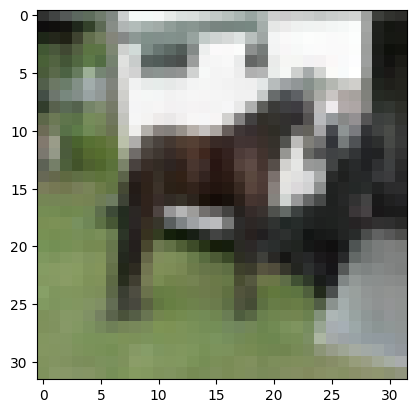

In [ ]:
plt.imshow(x_test[20])

In [ ]:
# Example: if you have class names like this
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']  # replace with your actual class names

# Get the prediction probabilities
predictions = model.predict(x_test_sample)

# Get the index of the class with the highest probability
predicted_class_index = np.argmax(predictions)

# Get the corresponding class name
predicted_class_name = class_names[predicted_class_index]

print(f"The predicted class is: {predicted_class_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
The predicted class is: airplane
